In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Questions for these datasets:

Q1: Is a certain type of wine (red or white) associated with higher quality?

Q2: What level of acidity (pH value) receives the highest average rating?

Acidity Levels:
High: Lowest 25% of pH values
Moderately High: 25% – 50% of pH values
Medium: 50% – 75% of pH values
Low: 75% – max pH value

Q3: Do wines with higher alcoholic content receive better ratings?
We shall consider two groups of wine samples:

Low alcohol (samples with an alcohol content less than the median)
High alcohol (samples with an alcohol content greater than or equal to the median)

Q4: Do sweeter wines (more residual sugar) receive better ratings?

Q5:How significant are other chemicals for wine quality rating?

In [39]:
red_df = pd.read_csv('datasets/wine_quality/winequality-red.csv', sep=';')

white_df = pd.read_csv('datasets/wine_quality/winequality-white.csv', sep=';')

In [40]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [42]:
# check which columns have missing values, as well as the number of entries/features
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [43]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [44]:
# check for duplicates in the data
sum(red_df.duplicated())

240

In [45]:
# drop duplicates
red_df.drop_duplicates(inplace=True)
# confirm correction by rechecking for duplicates in the data
sum(red_df.duplicated())

0

In [29]:
sum(white_df.duplicated())

937

In [46]:
white_df.drop_duplicates(inplace=True)
sum(white_df.duplicated())

0

In [47]:
# just looking around
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [48]:
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [54]:
# color column to merge both datasets
red_df['color'] = 'red'
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [53]:
white_df['color'] = 'white'
white_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [58]:
wine_df = red_df.append(white_df, ignore_index=True, sort=True)
wine_df

,alcohol,chlorides,citric acid,color,density,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,9.4,0.076,0.00,red,0.99780,7.4,11.0,3.51,5,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,red,0.99680,7.8,25.0,3.20,5,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,red,0.99700,7.8,15.0,3.26,5,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,red,0.99800,11.2,17.0,3.16,6,1.9,0.58,60.0,0.28
4,9.4,0.075,0.00,red,0.99780,7.4,13.0,3.51,5,1.8,0.56,40.0,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,11.2,0.039,0.29,white,0.99114,6.2,24.0,3.27,6,1.6,0.50,92.0,0.21
5316,9.6,0.047,0.36,white,0.99490,6.6,57.0,3.15,5,8.0,0.46,168.0,0.32
5317,9.4,0.041,0.19,white,0.99254,6.5,30.0,2.99,6,1.2,0.46,111.0,0.24
5318,12.8,0.022,0.30,white,0.98869,5.5,20.0,3.34,7,1.1,0.38,110.0,0.29


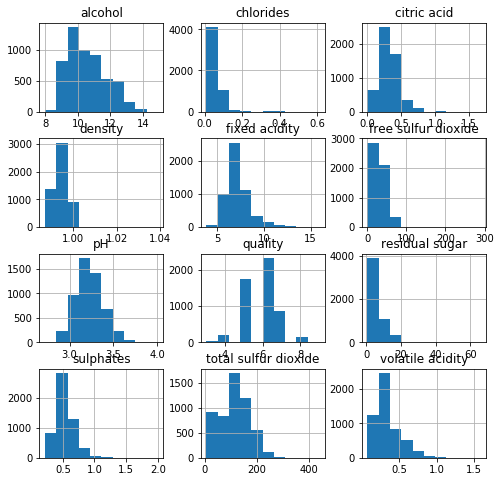

In [65]:
# look around, some distributions
wine_df.hist(figsize=(8, 8));

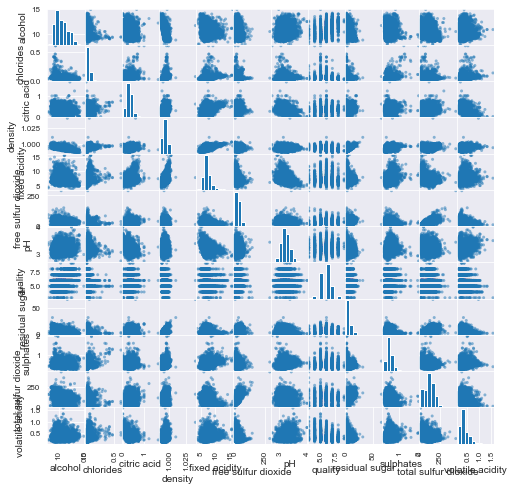

In [307]:
pd.plotting.scatter_matrix(wine_df, figsize=(8, 8));

# Q1: Is a certain type of wine (red or white) associated with higher quality?

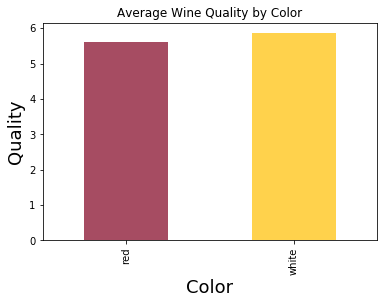

In [237]:
colors = ['#800020', '#FFBF00']
color_means = wine_df.groupby('color')['quality'].mean()
color_means.plot(kind='bar', title='Average Wine Quality by Color', color=colors, alpha=.7)
plt.xlabel('Color', fontsize=18)
plt.ylabel('Quality', fontsize=18);

In [243]:
counts = wine_df.groupby(['quality', 'color']).count()
counts

alcohol  chlorides  citric acid  density  fixed acidity  \
quality color                                                            
3       red         10         10           10       10             10   
        white       20         20           20       20             20   
4       red         53         53           53       53             53   
        white      153        153          153      153            153   
5       red        577        577          577      577            577   
        white     1175       1175         1175     1175           1175   
6       red        535        535          535      535            535   
        white     1788       1788         1788     1788           1788   
7       red        167        167          167      167            167   
        white      689        689          689      689            689   
8       red         17         17           17       17             17   
        white      131        131          131      131            131   
9       white        5          5            5        5              5   

               free sulfur dioxide    pH  residual sugar  sulphates  \
quality color                                                         
3       red                     10    10              10         10   
        white                   20    20              20         20   
4       red                     53    53              53         53   
        white                  153   153             153        153   
5       red                    577   577             577        577   
        white                 1175  1175            1175       1175   
6       red                    535   535             535        535   
        white                 1788  1788            1788       1788   
7       red                    167   167             167        167   
        white                  689   689             689        689   
8       red                     17    17              17         17   
        white                  131   131             131        131   
9       white                    5     5               5          5   

               total sulfur dioxide  volatile acidity  \
quality color                                           
3       red                      10                10   
        white                    20                20   
4       red                      53                53   
        white                   153               153   
5       red                     577               577   
        white                  1175              1175   
6       red                     535               535   
        white                  1788              1788   
7       red                     167               167   
        white                   689               689   
8       red                      17                17   
        white                   131               131   
9       white                     5                 5   

               linguistic quality estimate  
quality color                               
3       red                             10  
        white                           20  
4       red                             53  
        white                          153  
5       red                            577  
        white                         1175  
6       red                            535  
        white                         1788  
7       red                            167  
        white                          689  
8       red                             17  
        white                          131  
9       white                            5

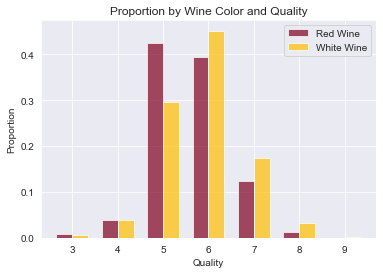

In [264]:
#We’re missing a red wine value for a the 9 rating. Even though this number is a 0, we need it for our plot. Run the last two cells after running the cell below.

# get counts for each rating and color
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
color_counts

# get total counts for each color
color_totals = wine_df.groupby('color').count()['pH']
color_totals

# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

red_proportions['9'] = 0
red_proportions

ind = np.arange(len(red_proportions)) # the x locations for the groups
width = 0.35 # the width of the bars

# plot bars
red_bars = plt.bar(ind, red_proportions, width, color=colors[0], alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color=colors[1], alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2 # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9'] # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

# /Q1: Is a certain type of wine (red or white) associated with higher quality?

Somewhat, as it seems

# Q2: What level of acidity (pH value) receives the highest average rating?

In [269]:
wine_df['pH'].describe() # View the min, 25%, 50%, 75%, max pH values

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: pH, dtype: float64

In [288]:
bin_edges = [2.72, 3.11, 3.21, 3.33, 4.01] # Fill in this list with five values you just found

bin_names = [ 'high', 'moderately high' , 'medium', 'low' ] # Name each acidity level category

# Creates acidity_levels column
wine_df['acidity levels'] = pd.cut(df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
wine_df.head()

# Find the mean quality of each acidity level with groupby
wine_df.groupby('acidity levels').mean()['quality']

acidity levels
high               5.742447
moderately high    5.775264
medium             5.869125
low                5.859076
Name: quality, dtype: float64

# /Q2: What level of acidity (pH value) receives the highest average rating?

Medium-to-Low

# Q3: Do wines with higher alcoholic content receive better ratings?

In [274]:
# get the median amount of alcohol content
wine_df['alcohol'].describe()

count    5320.000000
mean       10.549241
std         1.185933
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.900000
Name: alcohol, dtype: float64

In [289]:
# select samples with alcohol content less than the median
low_alcohol = wine_df[wine_df['alcohol'] < 10.549241]

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df[wine_df['alcohol'] >= 10.549241]

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

# get mean quality rating for the low alcohol and high alcohol groups
bin_edges = [8,10.5,14.9]
bin_names = ['low', 'high']
wine_df['alcohol levels'] = pd.cut(wine_df['alcohol'], bin_edges, labels=bin_names)
wine_df.groupby('alcohol levels').mean()['quality']

alcohol levels
low     5.479933
high    6.195070
Name: quality, dtype: float64

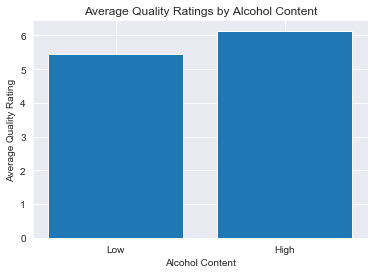

In [290]:
# Use query to select each group and get its mean quality
median = wine_df['alcohol'].median()
low = wine_df['alcohol < {}'.format(median))
high = wine_df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

# /Q3: Do wines with higher alcoholic content receive better ratings?

Kind of, but not drasticaly(on average)

# Q4:Do sweeter wines receive higher ratings?

0.024489548323494148

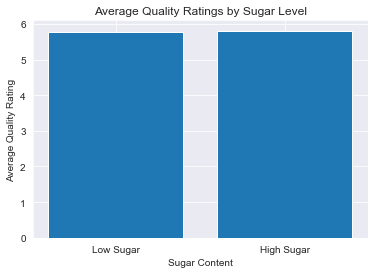

In [305]:
# Use query to select each group and get its mean quality
median = wine_df['residual sugar'].median()
lowsugar = wine_df.loc[wine_df['residual sugar'] < median]
highsugar = wine_df.loc[wine_df['residual sugar'] >= median]

num_samples = wine_df.shape[0]
num_samples == lowsugar['quality'].count() + highsugar['quality'].count() # should be True

mean_lowsugar = lowsugar['quality'].mean()
mean_highsugar = highsugar['quality'].mean()

# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_lowsugar, mean_highsugar]
labels = ['Low Sugar', 'High Sugar']
plt.bar(locations, heights, tick_label=labels)
plt.title ('Average Quality Ratings by Sugar Level')
plt.xlabel('Sugar Content')
plt.ylabel('Average Quality Rating');
mean_highsugar-mean_lowsugar

# /Q4:Do sweeter wines receive higher ratings?

On average no

# Q5:How significant are other chemicals for wine quality rating?

In [90]:
red_df.groupby(['quality']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.171231,0.578596,0.244523,2.509532,0.093971,17.161179,57.406412,0.997082,3.300815,0.623570,9.888562
6,8.337383,0.496084,0.279364,2.457290,0.085075,15.637383,40.816822,0.996565,3.318000,0.674542,10.658879
7,8.858683,0.403653,0.371856,2.716766,0.076832,13.994012,35.449102,0.996051,3.290060,0.742635,11.491118
8,8.441176,0.427647,0.382941,2.576471,0.068353,13.764706,34.470588,0.995095,3.274118,0.774706,12.158824


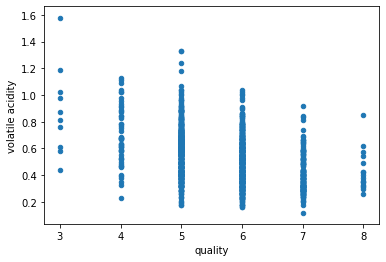

In [99]:
red_df.plot(x='quality', y='volatile acidity', kind='scatter');

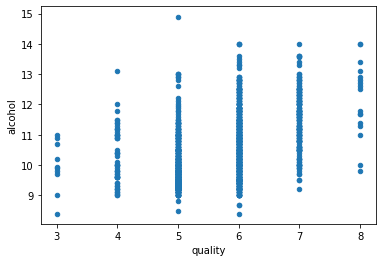

In [107]:
red_df.plot(x='quality', y='alcohol', kind='scatter');

In [357]:
white_df.groupby(['quality']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.139869,0.382157,0.305229,4.499346,0.050059,23.127451,124.127451,0.994199,3.185425,0.476667,10.197712
5,6.921745,0.303306,0.335957,6.941532,0.052323,36.002979,150.099574,0.995072,3.171779,0.482621,9.864182
6,6.819435,0.261630,0.338227,5.959787,0.045178,35.308166,136.460850,0.993722,3.196029,0.492355,10.646122
7,6.701089,0.265363,0.327358,4.523875,0.037556,33.851234,122.052975,0.992059,3.228462,0.502859,11.515844
8,6.609924,0.286794,0.335038,5.056489,0.036756,35.618321,122.034351,0.991745,3.235115,0.485878,11.880153
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


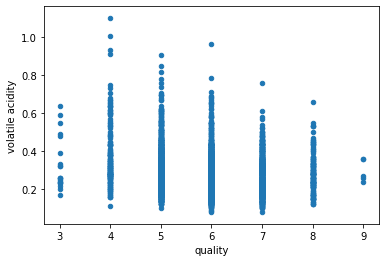

In [109]:
white_df.plot(x='quality', y='volatile acidity', kind='scatter');

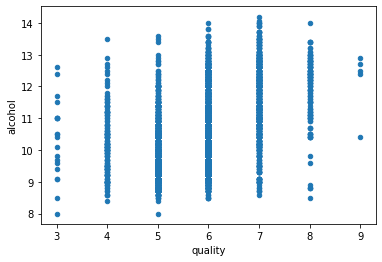

In [113]:
white_df.plot(x='quality', y='alcohol', kind='scatter');

In [358]:
#Some considerable variance of means appears to be observed only among these parameters
df = wine_df[['quality', 'citric acid', 'volatile acidity', 'chlorides', 'pH', 'alcohol', 'free sulfur dioxide', 'total sulfur dioxide']].copy() 
df.groupby(['quality']).mean()
#pd.plotting.scatter_matrix(df, figsize=(8, 8))
#df.info()


,citric acid,volatile acidity,chlorides,pH,alcohol,free sulfur dioxide,total sulfur dioxide
quality,,,,,,,
3,0.281000,0.517000,0.077033,3.257667,10.215000,39.216667,122.033333
4,0.271505,0.462379,0.060510,3.235874,10.215049,20.332524,101.516990
5,0.305845,0.393970,0.066039,3.214275,9.872211,29.797660,119.572203
6,0.324671,0.315626,0.054366,3.224120,10.649060,30.777873,114.433491
7,0.336040,0.292342,0.045218,3.240479,11.511020,29.977220,105.157126
8,0.340541,0.302973,0.040385,3.239595,11.912162,33.108108,111.976351
9,0.386000,0.298000,0.027400,3.308000,12.180000,33.400000,116.000000


In [168]:
wine_df['linguistic quality estimate'] = '1mediocre'
wine_df.loc[wine_df['quality'] > 4, 'linguistic quality estimate'] = '2decent'
wine_df.loc[wine_df['quality'] > 7, 'linguistic quality estimate'] = '3good'

#ling_df = wine_df.groupby(['linguistic quality estimate'])
df_1 = wine_df[wine_df['linguistic quality estimate'] == '1mediocre']
df_2 = wine_df[wine_df['linguistic quality estimate'] == '2decent']
df_3 = wine_df[wine_df['linguistic quality estimate'] == '3good']

wine_df.groupby(['linguistic quality estimate']).mean()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
linguistic quality estimate,,,,,,,,,,,,
1mediocre,10.215042,0.062610,0.272712,0.994921,7.374153,22.733051,3.238644,3.872881,4.175424,0.507331,104.125000,0.469322
2decent,10.522676,0.056926,0.319955,0.994592,7.219215,30.290610,3.223462,5.818292,5.099513,0.535100,114.648956,0.339420
3good,11.920915,0.039961,0.342026,0.992108,6.839869,33.117647,3.241830,8.032680,4.750327,0.517320,112.107843,0.302810


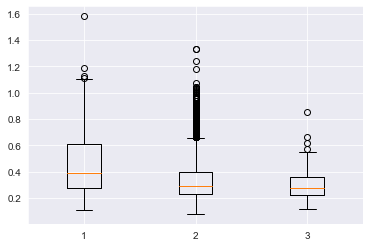

In [351]:
#wine_df.plot(x='linguistic quality estimate', y='volatile acidity', kind='box');
#fig, ax = plt.subplots(figsize=(8, 6))
#ax.box(df_1['volatile acidity']);


plt.boxplot([df_1['volatile acidity'], df_2['volatile acidity'], df_3['volatile acidity']]);

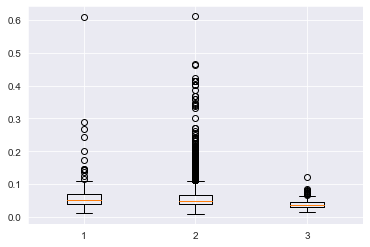

In [353]:
plt.boxplot([df_1['chlorides'], df_2['chlorides'], df_3['chlorides']]);

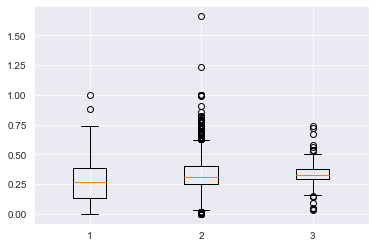

In [354]:
plt.boxplot([df_1['citric acid'], df_2['citric acid'], df_3['citric acid']]);

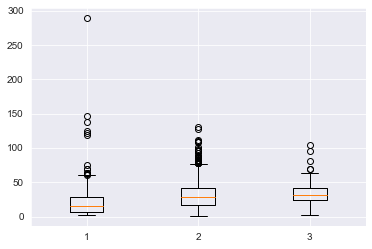

In [356]:
plt.boxplot([df_1['free sulfur dioxide'], df_2['free sulfur dioxide'], df_3['free sulfur dioxide']]);

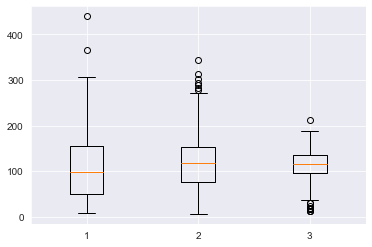

In [359]:
plt.boxplot([df_1['total sulfur dioxide'], df_2['total sulfur dioxide'], df_3['total sulfur dioxide']]);

# /Q5:How significant are other chemicals for wine quality rating?

In general, the most significant chemicals for quality rating in these datasets appear to be volatile acidity, chlorides, citric acid, free sulfur dioxide and total sulfur dioxide.
And, in general, the higher quality wines exhibit smaller content and smaller spread of the aforementioned characteristics

# Conclusions:

/Q1: Is a certain type of wine (red or white) associated with higher quality?

Somewhat, as it seems

/Q2: What level of acidity (pH value) receives the highest average rating?

Medium-to-Low

/Q3: Do wines with higher alcoholic content receive better ratings?

Kind of, but not drasticaly(on average)

/Q4:Do sweeter wines receive higher ratings?

On average no

/Q5:How significant are other chemicals for wine quality rating?

In general, the most significant chemicals for quality rating in these datasets appear to be volatile acidity, chlorides, citric acid, free sulfur dioxide and total sulfur dioxide.
And, in general, the higher quality wines exhibit smaller content and smaller spread of the aforementioned characteristics

Some final remarks:
The distinctness of taste/flavour of wine is the result of complex combination of, sometimes unique, organic/non-organic chemical compounds, I don't think we can reliably estimate the relative significance of wine quality factors with these datasets, since they don't have features for such aromatic compounds.

Some unfinished experiments:

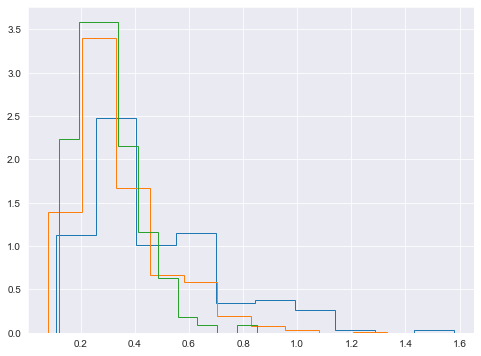

In [286]:
#wine_df.groupby().count()
#totals = wine_df.groupby(['linguistic quality estimate']).count()['volatile acidity']
#proportions = counts / totals
#proportion1 = 
fig, ax = plt.subplots(figsize=(8, 6))
#ax.plot(kind='bar', df_1['volatile acidity']/len(df_1.index), alpha=0.5, label='1mediocre')
#ax.plot(kind='bar', df_2['volatile acidity']/len(df_2.index), alpha=0.5, label='2decent')
#ax.plot(kind='bar', df_3['volatile acidity']/len(df_3.index), alpha=0.5, label='3good')
ax.hist(df_1['volatile acidity'], density=True, histtype='step', stacked=True);
ax.hist(df_2['volatile acidity'], density=True, histtype='step', stacked=True);
ax.hist(df_3['volatile acidity'], density=True, histtype='step', stacked=True);
#ax.scatter(df_2['volatile acidity'])
#ax.set_title('Dsitributions of linguistic ratings')
#ax.set_xlabel('volatile acidity')
#ax.set_ylabel('proportion')
#ax.legend(loc='upper right')
#plt.show()

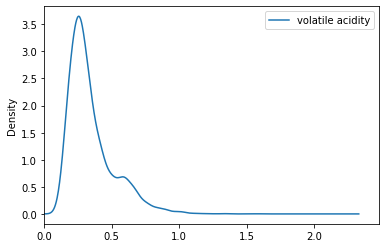

In [87]:
wine_df.plot(x='quality', y='volatile acidity', kind='density', xlim=0);

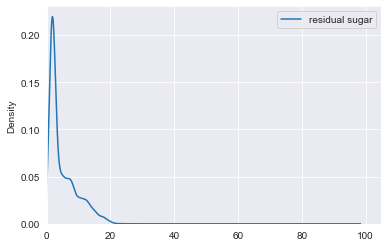

In [265]:
wine_df.plot(x='quality', y='residual sugar', kind='density', xlim=0, ylim=0);

In [122]:
wine_df.groupby(pd.cut(wine_df['quality'], np.arange(0, 10, 2))).mean()

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
"(0, 2]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2, 4]",10.215042,0.062610,0.272712,0.994921,7.374153,22.733051,3.238644,3.872881,4.175424,0.507331,104.125000,0.469322
"(4, 6]",10.315063,0.059385,0.316577,0.994961,7.239632,30.356442,3.219887,5.570061,5.294491,0.532047,116.642822,0.349309
"(6, 8]",11.570153,0.044506,0.336703,0.992734,7.077540,30.438745,3.240349,7.147410,4.259811,0.545129,106.162351,0.293909
